In [1]:
import pandas as pd
import os
import ete3
from Bio import AlignIO
import re
ncbi = ete3.NCBITaxa() #names function from ete package
from ete3 import PhyloTree

%cd ~/Desktop/ 

/Users/sarahschwartz/Desktop


In [2]:
fasta = AlignIO.read("aligned_renamed_file.fa", 'fasta')
aa_state = {}
for block in fasta:
    aa_state[block.name.replace("|", '_').replace('/','_')] = block.seq[176]

#Designed for ALIGNED fasta file with taxa entry format >Phycisphaera_mikurensis|WP_014437890.1
#makes a "dictionary" out of your alignment, to use as a reference for site-specific labels later.
#the number specified for block.seq is the position in the alignment.
#we have modified the naming convention to eliminate any common problems with naming code--replaces bars and errant slashes with underscores.

In [3]:
block.seq[176], block.name

('N', 'Fusobacterium_gonidiaformans|WP_039991140.1')

In [4]:
aa_state;

In [5]:
tree = ete3.Tree("aligned_renamed_file.fa.treefile")
#loads newick treefile 

In [6]:
print (tree)
#ASCII tree 


   /-Phycisphaera_mikurensis_WP_014437890.1
  |
  |   /-Rhodopirellula_sp._SM50_WP_095737488.1
  |--|
  |   \-Rubripirellula_obstinata_WP_068263143.1
  |
  |      /-Myxococcales_bacterium_MBR56984.1
  |   /-|
  |  |   \-Planctomycetes_bacterium_MAB81014.1
  |  |
  |  |            /-Thermus_caliditerrae_WP_038048431.1
  |  |         /-|
  |  |        |   \-Thermus_filiformis_WP_038066398.1
  |  |        |
  |  |      /-|   /-Deinococcus_wulumuqiensis_WP_017870872.1
  |  |     |  |  |
  |  |     |  |  |         /-Melittangium_boletus_WP_095982923.1
  |  |     |   \-|      /-|
  |  |     |     |     |  |   /-Cystobacter_ferrugineus_WP_071901660.1
  |  |     |     |   /-|   \-|
  |  |   /-|     |  |  |      \-Cystobacter_fuscus_WP_095984373.1
  |  |  |  |      \-|  |
  |  |  |  |        |   \-Vitiosangium_sp._GDMCC_1.1324_WP_108069193.1
  |  |  |  |        |
  |  |  |  |         \-Archangium_gephyra_WP_047855156.1
  |  |  |  |
  |  |  |  |   /-Thermorudis_peleae_WP_081886842.1
  |  |  |  

In [9]:
len(tree)

350

In [7]:
for leaf in tree.get_leaves():
    leaf.add_feature('aa',aa_state[leaf.name])
#for each leaf/node, adds the given amino acid state of residue specified above to the end of the leaf name, stores it as leaf.aa

In [8]:
leaf.name, leaf.dist, leaf.support, leaf.aa
#evaluates data for a node

('Congregibacter_litoralis_WP_008293056.1', 1.8294398082, 1.0, 'T')

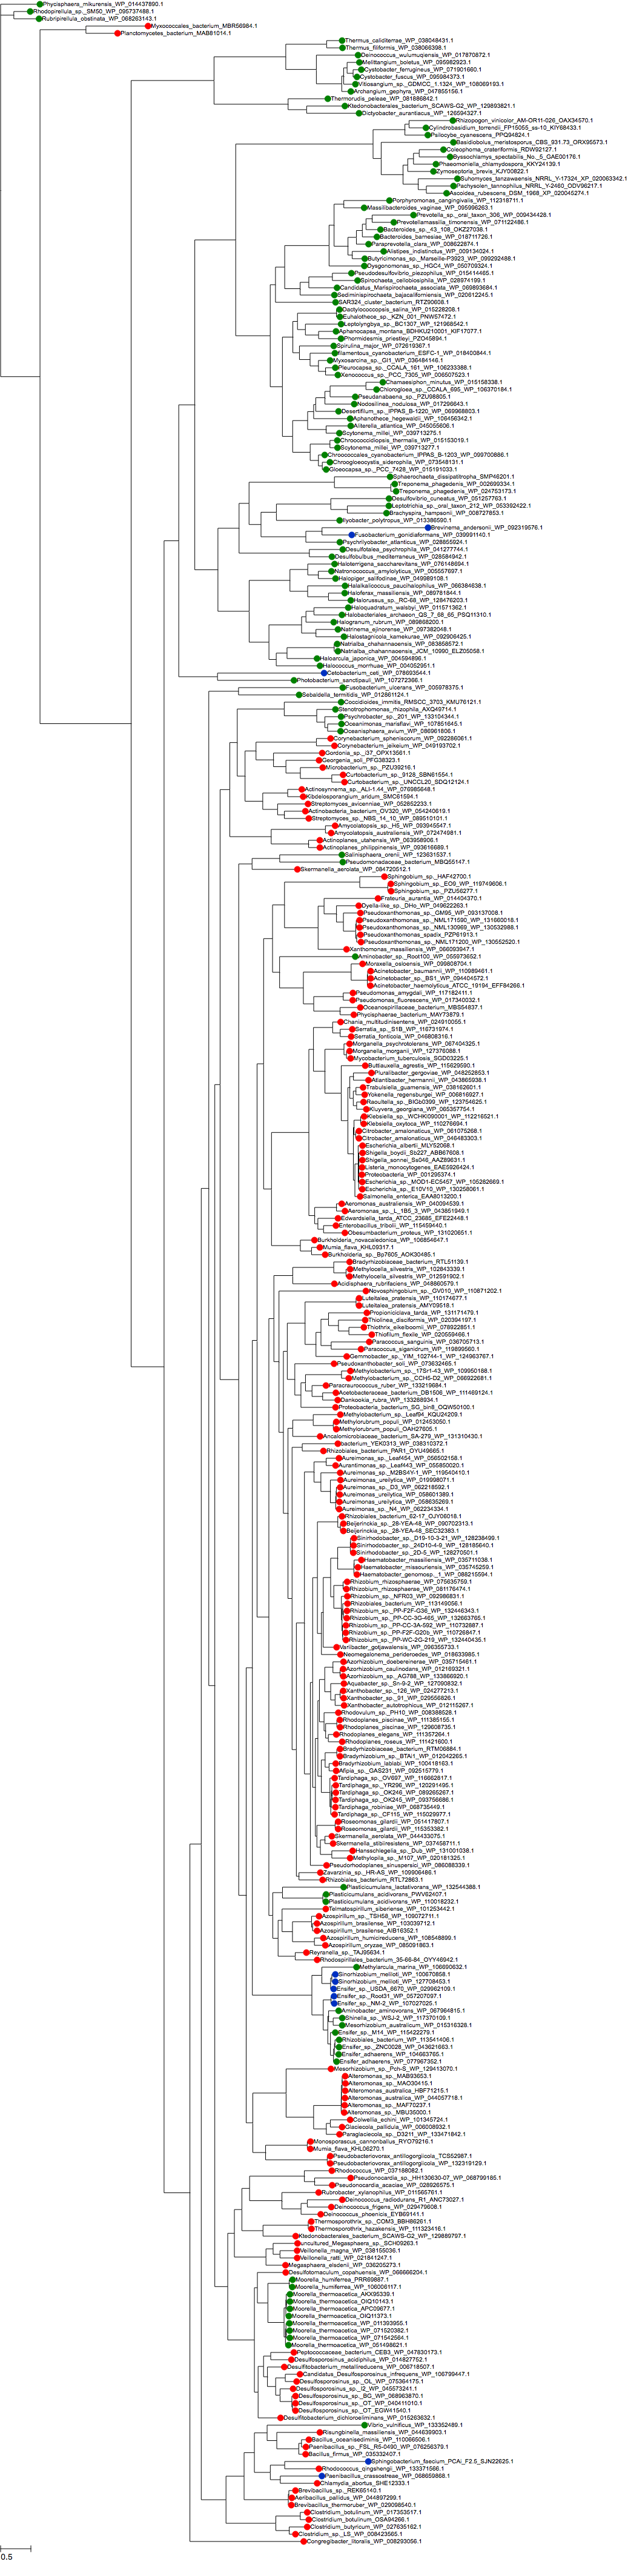

In [11]:
for node in tree.traverse():
    if not node.is_leaf():
        node.img_style['size'] = 0
    else:
        node.img_style['size'] = 10

        if node.aa == 'T':
            node.img_style['fgcolor'] = 'red'
        elif node.aa == 'S':
            node.img_style['fgcolor'] = 'green'
#traverses entire tree and analyzes each node state. 
#sets internal node size to 0 so they don't appear on tree, sets leaf node size to 10 so they appear well
#colors target/alternate residues as specified

tStyle = ete3.TreeStyle()
tStyle.scale = 100 #resets branch length
tree.render(file_name='%%inline', tree_style=tStyle)
#tree.render(file_name='color_labeled_alltaxa_may16.pdf');
#sets scalebar and renders to desired output file. can use the inline output to check before writing to pdf